# Word2Vec on DNA sequences

##### Miri Ostrovsky, last updated: 6.3.17

We will try to use word2vec methods for analysis of DNA sequences.
Assumption: Sequences can be treated in NLP methods, meaning - similar sequences appear with similar contexts.

In [1]:
import biovec
from sklearn.decomposition import PCA
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
import sys

In [2]:
def split_ngrams_no_repetitions(seq, n, reading_frame):
    """
    'acccgtgtctgg', n=3, reading frame = 1: ['acc', 'cgt', 'gtc', 'tgg']
    reading frame = 2: ['ccc', 'gtg', 'tct']
    reading frame = 3: ['ccg', 'tgt', 'ctg']
    """
    a, b, c = zip(*[iter(seq)]*n), zip(*[iter(seq[1:])]*n), zip(*[iter(seq[2:])]*n)
    str_ngrams = []
    for ngrams in [a,b,c]:
        x = []
        for ngram in ngrams:
            x.append("".join(ngram))
        str_ngrams.append(x)
    return str_ngrams[reading_frame-1]



In [3]:
test_string = 'acccgtgtctgg'
print('Reading frame 1: ' + str(split_ngrams_no_repetitions(test_string, 3, 1)))
print('Reading frame 2: ' + str(split_ngrams_no_repetitions(test_string, 3, 2)))
print('Reading frame 3: ' + str(split_ngrams_no_repetitions(test_string, 3, 3)))

Reading frame 1: ['acc', 'cgt', 'gtc', 'tgg']
Reading frame 2: ['ccc', 'gtg', 'tct']
Reading frame 3: ['ccg', 'tgt', 'ctg']


In [4]:

def generate_corpusfile_no_repetitions(corpus_fname, n, reading_frame, out):
    '''
    Args:
        corpus_fname: corpus file name
        n: the number of chunks to split. In other words, "n" for "n-gram"
        reading_frame: 1/2/3 for splitting
        out: output corpus file path
    Description:
        Protvec uses word2vec inside, and it requires to load corpus file
        to generate corpus.
    '''
    f = open(out, "w")
    for r in SeqIO.parse(corpus_fname, "fasta"):
        ngram_patterns = split_ngrams_no_repetitions(r.seq, n, reading_frame)
        f.write(" ".join(ngram_patterns) + "\n")

    f.close()

In [5]:
input_file = 'HC_38_BB.fasta'
out_file = 'HC_38_BB_corpus.txt'
reading_frame = 1
n = 3
generate_corpusfile_no_repetitions(input_file, n, reading_frame, out_file)


In [6]:
myfile = open(out_file,'r').read()
print(myfile[0:1000])

GGG AAA AGG GTT GGG GCG GAT GCA CTC CCT GAG GAG ACG GTG ACC AGG GTT CCC TGG CCC CAG GGG TCG AAC CAG GCA AGA GCT CGT CGT AGG CCT CTC GCA CAA TAA TAC ACG GCC GTG TCG TCA GAT CTC AGG CTG CTC AGC TCC ATG TAG GCT GTG CTT AGG GAG GTG TCC CAG GTC ATG GAG ACT CTG CCC TGG AAT CTC TGT GCA TAA GCT GTG CTA CCA CTA TTA GGG TTC ATC CAA CCC ACC CAC TCA AGC CCT TGT CCA GCG GCC TGT CGC ACC CAG TTG ATA TCA AAA TTG GTG AAG GTG TAT CCA GAA GCC ATG CAG GAG ACC CTC ACT GAG GCC CCA GGC TTC TTC ACC TCA GCC CCA GAC TGC ACC AGC TGC ACC TGG GAG TGG GCA CTT GTA GCT GCT GCC ACC AAG AAG AGG ATC CTC CAG GTC CAG TCC ATG GTG AGG AGC TGT GCT CAC AGG GTT TTC TCT AGA GGA CAG ATG TGG TTG TTG AGT GAT
GGG AAA AGG GTT GGG GCG GAT GCA CTC CCT GAG GAG ACG GTG ACC AGG GTT CCC TGG CCC CAG TAG TCG GTA CCA GCC ACT GCT ATA CCC GCG CGG TAG GTC GCA CAG TAA TAC ACA GCC GTG TCC TCG GCT CTC AGG CTG TTC ATT TGC AGA TAC AGT GAG TTC TTG GCG TTG TCT CTG GAG ATG GTG AAT CGG CCC TTC ACT GAG TCT GCG TAG TAT ATG TAA CTA CTA CTA CTA CTA ATG GAT 

In [7]:
## in biovec module we build the AA model

In [8]:
from gensim.models import Word2Vec
from gensim.models import word2vec
corpus = word2vec.Text8Corpus(out_file)
model = Word2Vec(corpus, size=100, window = 25)
fname = 'aamodel'
model.save(fname)
model = Word2Vec.load(fname)  

In [9]:
model.wv.similar_by_word('TAA')

[('TTG', 0.47910261154174805),
 ('TAG', 0.4693396985530853),
 ('GTG', 0.4372991919517517),
 ('ACG', 0.4208639860153198),
 ('GCG', 0.40068939328193665),
 ('TTC', 0.35099858045578003),
 ('GAG', 0.3402004539966583),
 ('CTC', 0.3389648199081421),
 ('ATT', 0.3029581308364868),
 ('ATG', 0.285388708114624)]

In [10]:
import itertools
all_ngrams = [list(n) for n in itertools.product('ACTG', repeat = 3)]
#for ngram in all_ngrams:
#    print(''.join(ngram))
words = [''.join(ngram) for ngram in all_ngrams]
print(words)

['AAA', 'AAC', 'AAT', 'AAG', 'ACA', 'ACC', 'ACT', 'ACG', 'ATA', 'ATC', 'ATT', 'ATG', 'AGA', 'AGC', 'AGT', 'AGG', 'CAA', 'CAC', 'CAT', 'CAG', 'CCA', 'CCC', 'CCT', 'CCG', 'CTA', 'CTC', 'CTT', 'CTG', 'CGA', 'CGC', 'CGT', 'CGG', 'TAA', 'TAC', 'TAT', 'TAG', 'TCA', 'TCC', 'TCT', 'TCG', 'TTA', 'TTC', 'TTT', 'TTG', 'TGA', 'TGC', 'TGT', 'TGG', 'GAA', 'GAC', 'GAT', 'GAG', 'GCA', 'GCC', 'GCT', 'GCG', 'GTA', 'GTC', 'GTT', 'GTG', 'GGA', 'GGC', 'GGT', 'GGG']


In [12]:
pv = biovec.AAVec("HC_38_BB.fasta", out="output_38.txt")

Generate Corpus file from fasta file...


In [13]:
myfile = open("output_38.txt",'r').read()
print(myfile[0:1000])

GGG AAA AGG GTT GGG GCG GAT GCA CTC CCT GAG GAG ACG GTG ACC AGG GTT CCC TGG CCC CAG GGG TCG AAC CAG GCA AGA GCT CGT CGT AGG CCT CTC GCA CAA TAA TAC ACG GCC GTG TCG TCA GAT CTC AGG CTG CTC AGC TCC ATG TAG GCT GTG CTT AGG GAG GTG TCC CAG GTC ATG GAG ACT CTG CCC TGG AAT CTC TGT GCA TAA GCT GTG CTA CCA CTA TTA GGG TTC ATC CAA CCC ACC CAC TCA AGC CCT TGT CCA GCG GCC TGT CGC ACC CAG TTG ATA TCA AAA TTG GTG AAG GTG TAT CCA GAA GCC ATG CAG GAG ACC CTC ACT GAG GCC CCA GGC TTC TTC ACC TCA GCC CCA GAC TGC ACC AGC TGC ACC TGG GAG TGG GCA CTT GTA GCT GCT GCC ACC AAG AAG AGG ATC CTC CAG GTC CAG TCC ATG GTG AGG AGC TGT GCT CAC AGG GTT TTC TCT AGA GGA CAG ATG TGG TTG TTG AGT GAT
GGG AAA AGG GTT GGG GCG GAT GCA CTC CCT GAG GAG ACG GTG ACC AGG GTT CCC TGG CCC CAG TAG TCG GTA CCA GCC ACT GCT ATA CCC GCG CGG TAG GTC GCA CAG TAA TAC ACA GCC GTG TCC TCG GCT CTC AGG CTG TTC ATT TGC AGA TAC AGT GAG TTC TTG GCG TTG TCT CTG GAG ATG GTG AAT CGG CCC TTC ACT GAG TCT GCG TAG TAT ATG TAA CTA CTA CTA CTA CTA ATG GAT 

In [14]:

dict_list_in_vecs = [pv[words[index]] for index in range(len(words))]


/home/miri-o/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [15]:
import codecs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mpld3
from sklearn.manifold import TSNE
from numpy import linalg as LA
%matplotlib inline
#mpld3.enable_notebook()



def visualize():
    
    # show 1000 words
    num_to_show = 1000
    # perform TSNE
    X_embedded = TSNE(n_components=2).fit_transform(dict_list_in_vecs)
    # plot the words vectors with their labels
    mpl.rcParams['figure.figsize'] = (12,12)
    mpl.rcParams.update({'font.size': 22})
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    for word, x, y in zip(words, X_embedded[:,0], X_embedded[:,1]):
        plt.annotate(word, xy=(x, y), xytext=(x,y), textcoords="data")
    plt.show()
    
    

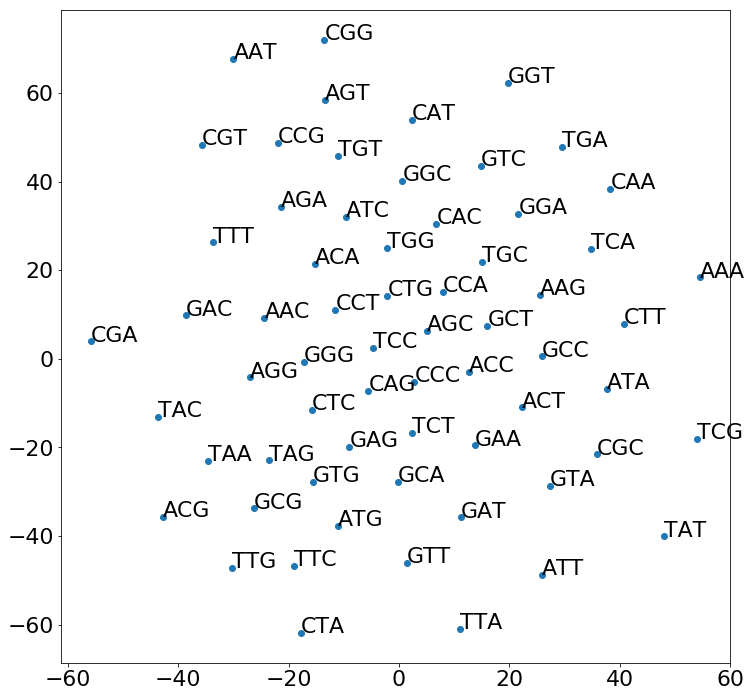

In [16]:
visualize()